In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [3]:
#import CSV files
avg_rental_price = pd.read_csv('Resources/medianAskingRent_All.csv')

total_inventory = pd.read_csv('Resources/rentalInventory_All.csv')

total_inventory.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03
0,All Downtown,Manhattan,submarket,4258,4525,4596,4681,4489,4579,4261,...,7686,8018,7927,6660,6199,5538,4903,5202,4870,5047
1,All Midtown,Manhattan,submarket,3065,3207,3242,3415,3120,3115,3029,...,4868,4930,5132,4578,4456,4009,3734,3847,3551,3749
2,All Upper East Side,Manhattan,submarket,2549,2651,2641,2589,2497,2667,2575,...,2842,3050,3138,2704,2648,2331,2066,2160,2004,2001
3,All Upper Manhattan,Manhattan,submarket,846,843,813,738,707,770,754,...,2580,2720,2863,2488,2519,2387,2098,2183,2014,1957
4,All Upper West Side,Manhattan,submarket,2164,2187,2307,2453,2328,2414,2220,...,2566,2638,2617,2236,2171,1991,1757,1848,1747,1703


In [4]:
avg_rental_price.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3020.0,3100.0,3100.0,3200.0,3195.0,...,4950.0,4897.0,4810.0,4850.0,4700.0,4712.0,4780.0,4814.0,4850.0,4895.0
1,All Midtown,Manhattan,submarket,2875.0,2800.0,2800.0,2850.0,2895.0,2950.0,3000.0,...,4500.0,4495.0,4495.0,4475.0,4350.0,4300.0,4335.0,4449.0,4435.0,4437.0
2,All Upper East Side,Manhattan,submarket,2450.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,4000.0,4000.0,3995.0,4000.0,3995.0,4000.0,3950.0,3950.0,3995.0,3950.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2950.0,2900.0,2900.0,2850.0,2800.0,2800.0,2798.0,2800.0,2900.0,2895.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2800.0,2795.0,2800.0,...,4402.0,4500.0,4500.0,4500.0,4450.0,4381.0,4250.0,4297.0,4300.0,4425.0


In [5]:
#Index by borough
new_df = avg_rental_price.set_index("areaType").drop(columns=['areaName'])
rent_price_borough = new_df.loc['borough'].set_index('Borough')

rent_price_borough.head()

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03
Borough,,,,,,,,,,,,,,,,,,,,,
Bronx,1600.0,1600.0,1508.0,1508.0,1600.0,1500.0,1529.0,1600.0,1600.0,1500.0,...,2575.0,2575.0,2600.0,2650.0,2523.0,2550.0,2500.0,2600.0,2600.0,2600.0
Brooklyn,2200.0,2150.0,2150.0,2150.0,2200.0,2250.0,2300.0,2300.0,2400.0,2395.0,...,3436.0,3500.0,3500.0,3490.0,3395.0,3295.0,3295.0,3300.0,3330.0,3375.0
Manhattan,2800.0,2795.0,2719.0,2800.0,2800.0,2815.0,2858.0,2886.0,2995.0,3000.0,...,4350.0,4325.0,4295.0,4283.0,4195.0,4150.0,4170.0,4200.0,4250.0,4296.0
Queens,1655.0,1675.0,1700.0,1695.0,1550.0,1550.0,1550.0,1550.0,1563.0,1600.0,...,2850.0,2900.0,2900.0,2900.0,2900.0,2895.0,2900.0,2850.0,2950.0,2995.0
Staten Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2000.0,1900.0,2000.0,2125.0,2200.0,2249.0,2253.0,2598.0,2500.0,2500.0


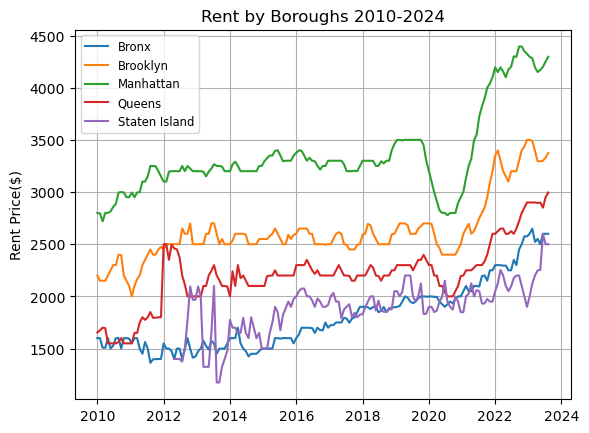

In [6]:
x_ticks = ["","2010","2012","2014","2016","2018","2020","2022","2024",""]

df_transposed = rent_price_borough.T
ax = df_transposed.plot.line()
ax.set_xticklabels(x_ticks)
ax.legend(fontsize='small')
plt.grid(True)
plt.ylabel("Rent Price($)")
plt.title("Rent by Boroughs 2010-2024")
plt.show()


In [45]:
first_last = rent_price_borough[['2010-01','2024-03']].fillna(0)
#percentage_change = first_last.pct_change().fillna(0)
first_last["Percentage of Change"] = ((first_last['2024-03'] - first_last['2010-01'])/first_last['2024-03'])*100
first_last["Percentage of Change"] = first_last["Percentage of Change"].map('{:.2f}%'.format)
print(first_last)

               2010-01  2024-03 Percentage of Change
Borough                                             
Bronx           1600.0   2600.0               38.46%
Brooklyn        2200.0   3375.0               34.81%
Manhattan       2800.0   4296.0               34.82%
Queens          1655.0   2995.0               44.74%
Staten Island      0.0   2500.0              100.00%
